## Import the data and produce basic descriptive data analysis

Import Statements

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import math
from scipy import stats
import re

Import Dataset

In [8]:
%%time
# Create your connection.
cnx = sqlite3.connect('FPA_FOD_20170508.sqlite')
df = pd.read_sql_query("SELECT * FROM Fires", cnx)

Wall time: 1min 44s


In [9]:
df.head().T

0  \
OBJECTID                                                                    1   
FOD_ID                                                                      1   
FPA_ID                                                             FS-1418826   
SOURCE_SYSTEM_TYPE                                                        FED   
SOURCE_SYSTEM                                                     FS-FIRESTAT   
NWCG_REPORTING_AGENCY                                                      FS   
NWCG_REPORTING_UNIT_ID                                                USCAPNF   
NWCG_REPORTING_UNIT_NAME                               Plumas National Forest   
SOURCE_REPORTING_UNIT                                                    0511   
SOURCE_REPORTING_UNIT_NAME                             Plumas National Forest   
LOCAL_FIRE_REPORT_ID                                                        1   
LOCAL_INCIDENT_ID                                                      PNF-47   
FIRE_CODE                                                                BJ8K   
FIRE_NAME                                                            FOUNTAIN   
ICS_209_INCIDENT_NUMBER                                                  None   
ICS_209_NAME                                                             None   
MTBS_ID                                                                  None   
MTBS_FIRE_NAME                                                           None   
COMPLEX_NAME                                                             None   
FIRE_YEAR                                                                2005   
DISCOVERY_DATE                                                     2.4534e+06   
DISCOVERY_DOY                                                              33   
DISCOVERY_TIME                                                           1300   
STAT_CAUSE_CODE                                                             9   
STAT_CAUSE_DESCR                                                Miscellaneous   
CONT_DATE                                                          2.4534e+06   
CONT_DOY                                                                   33   
CONT_TIME                                                                1730   
FIRE_SIZE                                                                 0.1   
FIRE_SIZE_CLASS                                                             A   
LATITUDE                                                              40.0369   
LONGITUDE                                                            -121.006   
OWNER_CODE                                                                  5   
OWNER_DESCR                                                              USFS   
STATE                                                                      CA   
COUNTY                                                                     63   
FIPS_CODE                                                                 063   
FIPS_NAME                                                              Plumas   
Shape                       b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...   

                                                                            1  \
OBJECTID                                                                    2   
FOD_ID                                                                      2   
FPA_ID                                                             FS-1418827   
SOURCE_SYSTEM_TYPE                                                        FED   
SOURCE_SYSTEM                                                     FS-FIRESTAT   
NWCG_REPORTING_AGENCY                                                      FS   
NWCG_REPORTING_UNIT_ID                                                USCAENF   
NWCG_REPORTING_UNIT_NAME                             Eldorado National Forest   
SOURCE_REPORTING_UNIT                                                    0503   
SOURCE_REPORTING_UNIT_NAM

In [10]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
import re    

def is_number_regex(s):
    """ Returns True is string is a number. """
    if re.match("^\d+?\,\d+?$", s) is None:
        return s.isdigit()
    return True

browser_path = r"geckodriver.exe"

driver = webdriver.Firefox(executable_path=browser_path)
driver.get("http://netstate.com/states/tables/st_size.htm")  # https://www.funderbeam.com/startups")
element = driver.find_element_by_xpath("/html/body/table/tbody/tr[2]/td[@id='contentcolumn']/table[@id='stripedtable']/tbody[2]")
details = element.text
details_1 = details.split("\n")
final = []
for entries in details_1:
    splitted = entries.split(" ")
    count = 1
    index1 = 0
    index2 = 0
    done = False
    num_range = []
    for value in splitted:
        res = is_number_regex(value)
        if count == 0 and res == True:
            continue
        if res == True and count > 0:
            index1 = count
            num_range.append(index1)
        count = count + 1
    if len(final) == 50:
        break
    final.append(splitted[num_range[1] : num_range[2]])
state_size = {}
for item in final:
    name = item[0:len(item)-1]
    value = item[-1]
    name_new = ""
    for string in name:
        if len(name) == 1:
            name_new = name_new + string
        if len(name) > 1:
            name_new = name_new + string + " "
    state_size[name_new] = value
state_size

{'Alaska': '570,374',
 'Texas': '261,914',
 'California': '155,973',
 'Montana': '145,556',
 'New Mexico ': '121,365',
 'Arizona': '113,642',
 'Nevada': '109,806',
 'Colorado': '103,730',
 'Wyoming': '97,105',
 'Oregon': '96,003',
 'Idaho': '82,751',
 'Utah': '82,168',
 'Kansas': '81,823',
 'Minnesota': '79,617',
 'Nebraska': '76,878',
 'South Dakota ': '75,898',
 'North Dakota ': '68,994',
 'Missouri': '68,898',
 'Oklahoma': '68,679',
 'Washington': '66,582',
 'Georgia': '57,919',
 'Michigan': '56,809',
 'Iowa': '55,875',
 'Illinois': '55,593',
 'Wisconsin': '54,314',
 'Florida': '53,997',
 'Arkansas': '52,075',
 'Alabama': '50,750',
 'North Carolina ': '48,718',
 'New York ': '47,224',
 'Mississippi': '46,914',
 'Pennsylvania': '44,820',
 'Louisiana': '43,566',
 'Tennessee': '41,220',
 'Ohio': '40,953',
 'Kentucky': '39,732',
 'Virginia': '39,598',
 'Indiana': '35,870',
 'Maine': '30,865',
 'South Carolina ': '30,111',
 'West Virginia ': '24,087',
 'Maryland': '9,775',
 'Vermont': '9

In [11]:
##map state abbreviations to state data.  Convert mileage to acres.  Map it to the dataframe.
state_sizes = pd.DataFrame(state_size, index = ['State']).T.reset_index()
state_sizes.columns = ['State_Full', 'Square_Miles']
abbr_states = {
        'AK': 'Alaska',        'AL': 'Alabama',        'AR': 'Arkansas',        'AS': 'American Samoa',
        'AZ': 'Arizona',        'CA': 'California',        'CO': 'Colorado',        'CT': 'Connecticut',
        'DC': 'District of Columbia',        'DE': 'Delaware',        'FL': 'Florida',        'GA': 'Georgia',
        'GU': 'Guam',        'HI': 'Hawaii',        'IA': 'Iowa',        'ID': 'Idaho',
        'IL': 'Illinois',        'IN': 'Indiana',        'KS': 'Kansas',        'KY': 'Kentucky',
        'LA': 'Louisiana',        'MA': 'Massachusetts',        'MD': 'Maryland',        'ME': 'Maine',
        'MI': 'Michigan',        'MN': 'Minnesota',        'MO': 'Missouri',        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',        'MT': 'Montana',        'NA': 'National',        'NC': 'North Carolina',
        'ND': 'North Dakota',        'NE': 'Nebraska',        'NH': 'New Hampshire',        'NJ': 'New Jersey',
        'NM': 'New Mexico',        'NV': 'Nevada',        'NY': 'New York',        'OH': 'Ohio',
        'OK': 'Oklahoma',        'OR': 'Oregon',        'PA': 'Pennsylvania',        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',        'SC': 'South Carolina',        'SD': 'South Dakota',        'TN': 'Tennessee',
        'TX': 'Texas',        'UT': 'Utah',        'VA': 'Virginia',        'VI': 'Virgin Islands',
        'VT': 'Vermont',        'WA': 'Washington',        'WI': 'Wisconsin',        'WV': 'West Virginia',
        'WY': 'Wyoming'}

states_abbr = dict((v,k) for k,v in abbr_states.items())

state_sizes['STATE'] = [states_abbr[x.strip()] for x in state_sizes['State_Full']]
state_sizes['Square_Miles'] = [int(x.replace(',', '')) for x in state_sizes['Square_Miles']]
state_sizes['Acreage'] = [state_sizes.loc[x,'Square_Miles']*460 for x in state_sizes.index]
state_sizes = state_sizes.drop(columns=['State_Full'])

df = df.merge(state_sizes, on='STATE')

In [12]:
state_sizes.head()

Square_Miles STATE    Acreage
0        570374    AK  262372040
1        261914    TX  120480440
2        155973    CA   71747580
3        145556    MT   66955760
4        121365    NM   55827900

In [13]:
df.head()

OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0         1       1  FS-1418826                FED   FS-FIRESTAT   
1         2       2  FS-1418827                FED   FS-FIRESTAT   
2         3       3  FS-1418835                FED   FS-FIRESTAT   
3         4       4  FS-1418845                FED   FS-FIRESTAT   
4         5       5  FS-1418847                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME  \
0                    FS                USCAPNF    Plumas National Forest   
1                    FS                USCAENF  Eldorado National Forest   
2                    FS                USCAENF  Eldorado National Forest   
3                    FS                USCAENF  Eldorado National Forest   
4                    FS                USCAENF  Eldorado National Forest   

  SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAME    ...      LONGITUDE  \
0                  0511     Plumas National Forest    ...    -121.005833   
1                  0503   Eldorado National Forest    ...    -120.404444   
2                  0503   Eldorado National Forest    ...    -120.735556   
3                  0503   Eldorado National Forest    ...    -119.913333   
4                  0503   Eldorado National Forest    ...    -119.933056   

  OWNER_CODE       OWNER_DESCR STATE COUNTY FIPS_CODE  FIPS_NAME  \
0        5.0              USFS    CA     63       063     Plumas   
1        5.0              USFS    CA     61       061     Placer   
2       13.0  STATE OR PRIVATE    CA     17       017  El Dorado   
3        5.0              USFS    CA      3       003     Alpine   
4        5.0              USFS    CA      3       003     Alpine   

                                               Shape Square_Miles   Acreage  
0  b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...       155973  71747580  
1  b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...       155973  71747580  
2  b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...       155973  71747580  
3  b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...       155973  71747580  
4  b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...       155973  71747580  

[5 rows x 41 columns]

In [14]:
df.to_csv("wildfire_fires.csv")

Dataset Descriptive Statistics

In [15]:
df.shape

(1858318, 41)

In [16]:
df.head().T

0  \
OBJECTID                                                                    1   
FOD_ID                                                                      1   
FPA_ID                                                             FS-1418826   
SOURCE_SYSTEM_TYPE                                                        FED   
SOURCE_SYSTEM                                                     FS-FIRESTAT   
NWCG_REPORTING_AGENCY                                                      FS   
NWCG_REPORTING_UNIT_ID                                                USCAPNF   
NWCG_REPORTING_UNIT_NAME                               Plumas National Forest   
SOURCE_REPORTING_UNIT                                                    0511   
SOURCE_REPORTING_UNIT_NAME                             Plumas National Forest   
LOCAL_FIRE_REPORT_ID                                                        1   
LOCAL_INCIDENT_ID                                                      PNF-47   
FIRE_CODE                                                                BJ8K   
FIRE_NAME                                                            FOUNTAIN   
ICS_209_INCIDENT_NUMBER                                                  None   
ICS_209_NAME                                                             None   
MTBS_ID                                                                  None   
MTBS_FIRE_NAME                                                           None   
COMPLEX_NAME                                                             None   
FIRE_YEAR                                                                2005   
DISCOVERY_DATE                                                     2.4534e+06   
DISCOVERY_DOY                                                              33   
DISCOVERY_TIME                                                           1300   
STAT_CAUSE_CODE                                                             9   
STAT_CAUSE_DESCR                                                Miscellaneous   
CONT_DATE                                                          2.4534e+06   
CONT_DOY                                                                   33   
CONT_TIME                                                                1730   
FIRE_SIZE                                                                 0.1   
FIRE_SIZE_CLASS                                                             A   
LATITUDE                                                              40.0369   
LONGITUDE                                                            -121.006   
OWNER_CODE                                                                  5   
OWNER_DESCR                                                              USFS   
STATE                                                                      CA   
COUNTY                                                                     63   
FIPS_CODE                                                                 063   
FIPS_NAME                                                              Plumas   
Shape                       b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...   
Square_Miles                                                           155973   
Acreage                                                              71747580   

                                                                            1  \
OBJECTID                                                                    2   
FOD_ID                                                                      2   
FPA_ID                                                             FS-1418827   
SOURCE_SYSTEM_TYPE                                                        FED   
SOURCE_SYSTEM                                                     FS-FIRESTAT   
NWCG_REPORTING_AGENCY                                                      FS   
NWCG_REPORTING_UNIT_ID                                                USCAENF   
NWCG_REPORTING_UNIT_NAME 

In [17]:
df.describe()

OBJECTID        FOD_ID     FIRE_YEAR  DISCOVERY_DATE  \
count  1.858318e+06  1.858318e+06  1.858318e+06    1.858318e+06   
mean   9.311970e+05  5.310534e+07  2.003677e+03    2.453053e+06   
std    5.395006e+05  1.005107e+08  6.689415e+00    2.444545e+03   
min    1.000000e+00  1.000000e+00  1.992000e+03    2.448622e+06   
25%    4.647742e+05  4.996512e+05  1.998000e+03    2.451060e+06   
50%    9.293535e+05  1.056764e+06  2.004000e+03    2.453142e+06   
75%    1.393942e+06  1.908981e+07  2.009000e+03    2.455038e+06   
max    1.880465e+06  3.003484e+08  2.015000e+03    2.457388e+06   

       DISCOVERY_DOY  STAT_CAUSE_CODE     CONT_DATE       CONT_DOY  \
count   1.858318e+06     1.858318e+06  9.886330e+05  988633.000000   
mean    1.656027e+02     5.896303e+00  2.453237e+06     172.671935   
std     8.980114e+01     3.419845e+00  2.687558e+03      84.317026   
min     1.000000e+00     1.000000e+00  2.448622e+06       1.000000   
25%     9.100000e+01     3.000000e+00  2.450700e+06     102.000000   
50%     1.660000e+02     5.000000e+00  2.453466e+06     181.000000   
75%     2.310000e+02     9.000000e+00  2.455754e+06     232.000000   
max     3.660000e+02     1.300000e+01  2.457392e+06     366.000000   

          FIRE_SIZE      LATITUDE     LONGITUDE    OWNER_CODE  Square_Miles  \
count  1.858318e+06  1.858318e+06  1.858318e+06  1.858318e+06  1.858318e+06   
mean   7.533362e+01  3.700241e+01 -9.605128e+01  1.055774e+01  9.135526e+04   
std    2.512422e+03  5.828111e+00  1.651048e+01  4.414498e+00  7.455566e+04   
min    1.000000e-05  1.892304e+01 -1.788026e+02  0.000000e+00  1.045000e+03   
25%    1.000000e-01  3.292611e+01 -1.104668e+02  8.000000e+00  4.871800e+04   
50%    1.000000e+00  3.553330e+01 -9.242420e+01  1.400000e+01  5.791900e+04   
75%    3.300000e+00  4.087806e+01 -8.246796e+01  1.400000e+01  1.136420e+05   
max    6.069450e+05  7.033060e+01 -6.697089e+01  1.500000e+01  5.703740e+05   

            Acreage  
count  1.858318e+06  
mean   4.202342e+07  
std    3.429560e+07  
min    4.807000e+05  
25%    2.241028e+07  
50%    2.664274e+07  
75%    5.227532e+07  
max    2.623720e+08

In [18]:
df['STATE'].value_counts().head()

CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
Name: STATE, dtype: int64

In [19]:
df['OWNER_DESCR'].value_counts()

MISSING/NOT SPECIFIED    1029032
PRIVATE                   314777
USFS                      188338
BIA                       106819
STATE OR PRIVATE           71880
BLM                        63278
STATE                      30756
NPS                        17458
FWS                        11995
TRIBAL                      8952
OTHER FEDERAL               6450
MUNICIPAL/LOCAL             4236
UNDEFINED FEDERAL           2206
COUNTY                      1841
BOR                          285
FOREIGN                       15
Name: OWNER_DESCR, dtype: int64

In [20]:
df['SOURCE_REPORTING_UNIT_NAME'].value_counts().head()

Georgia Forestry Commission           97844
Fire Department of New York           75461
South Carolina Forestry Commission    52064
Mississippi Forestry Commission       46396
Texas Forest Service                  42675
Name: SOURCE_REPORTING_UNIT_NAME, dtype: int64

In [21]:
df['STAT_CAUSE_DESCR'].value_counts()

Debris Burning       429022
Miscellaneous        323664
Arson                281295
Lightning            278465
Equipment Use        147610
Missing/Undefined    144901
Campfire              76136
Children              61165
Smoking               52861
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: STAT_CAUSE_DESCR, dtype: int64

In [22]:
%%time
# Create your connection.
cnx = sqlite3.connect('FPA_FOD_20170508.sqlite')
df2 = pd.read_sql_query("SELECT * FROM NWCG_UnitIDActive_20170109", cnx)

Wall time: 157 ms


In [23]:
df2.to_csv("wildfire_Units.csv")

In [24]:
df2.head().T

0  \
OBJECTID                                          1   
UnitId                                      USAKCAN   
GeographicArea                                   AK   
Gacc                                        USAKACC   
WildlandRole                 Resource Provider Only   
UnitType                             Non-Government   
Department                                       NG   
Agency                                          ANC   
Parent                                         None   
Country                                          US   
State                                            AK   
Code                                            CAN   
Name            Calista Regional Native Corporation   

                                         1                               2  \
OBJECTID                                 2                               3   
UnitId                            USAKCEKX                        USAKCFFX   
GeographicArea                          AK                              AK   
Gacc                               USAKACC                         USAKACC   
WildlandRole      Incident Host Geographic        Incident Host Geographic   
UnitType                   US County/Local                 US County/Local   
Department                              AK                              AK   
Agency                                 C&L                             C&L   
Parent                                None                            None   
Country                                 US                              US   
State                                   AK                              AK   
Code                                  CEKX                            CFFX   
Name            Central Emergency Services  City Fairbanks Fire Department   

                                             3                         4  
OBJECTID                                     4                         5  
UnitId                                USAKCFMX                   USAKCFQ  
GeographicArea                              AK                        AK  
Gacc                                   USAKACC                   USAKACC  
WildlandRole          Incident Host Geographic  Incident Host Geographic  
UnitType                       US County/Local                US Federal  
Department                                  AK                       DOD  
Agency                                     C&L                      USAF  
Parent                                    None                      None  
Country                                     US                        US  
State                                       AK                        AK  
Code                                      CFMX                       CFQ  
Name            Central Mat-Su Fire Department   Clear Air Force Station

In [25]:
df2.shape

(5867, 13)

In [26]:
df2['GeographicArea'].value_counts().head()

RM    1484
CA    1285
NW     755
SA     633
EA     401
Name: GeographicArea, dtype: int64

In [27]:
df2['WildlandRole'].value_counts().head()

Incident Host Geographic        5228
Dispatch/Coordination Center     328
Resource Provider Only           266
Fire/Radio Cashes                 29
Training Facility                  8
Name: WildlandRole, dtype: int64

In [28]:
df2['UnitType'].value_counts().head()

US County/Local    3063
US Federal         1791
US State            692
Interagency         129
Non-Government      123
Name: UnitType, dtype: int64

# Question 1: Wildfire frequency, severity and duration over time

### Question 1a) 
Has the annual frequency of wildfires increased over time? If so, what has been the rate of increase?  Has that increase been accelerating?

In [29]:
US_fires_per_year = pd.DataFrame(df['FIRE_YEAR'].value_counts())
US_fires_per_year.sort_index(inplace=True)
US_fires_per_year

FIRE_YEAR
1992      67968
1993      61981
1994      75947
1995      71467
1996      75571
1997      61441
1998      68356
1999      89355
2000      96416
2001      86586
2002      75654
2003      64639
2004      67394
2005      84328
2006     111472
2007      91879
2008      85360
2009      76634
2010      78138
2011      88060
2012      72756
2013      64746
2014      67710
2015      74460

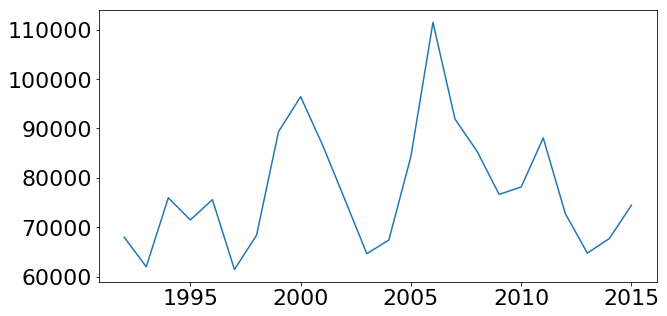

In [51]:
plt.figure(figsize=(10,5))
plt.plot(US_fires_per_year.index, US_fires_per_year['FIRE_YEAR'])
plt.show()

In [31]:
#growth rate
avg_annual_growth = math.pow((US_fires_per_year.loc[2015] / US_fires_per_year.loc[1992]),
                           (1/len(US_fires_per_year))) -1

print("The average annual growth rate in fires between 1994 and 2015 was: \
{p:0.2f}%".format(p=avg_annual_growth*100))

The average annual growth rate in fires between 1994 and 2015 was: 0.38%


In [32]:
slope, intercept, r_value, p_value, std_err = stats.linregress(
    US_fires_per_year.index,US_fires_per_year['FIRE_YEAR'])

print("slope: {s:0.3f}".format(s=slope))
print("r-squared: {r:0.3f}".format(r=r_value))
print("p-value: {p:0.3f}".format(p=p_value))

slope: 286.811
r-squared: 0.166
p-value: 0.439


### Analysis for Q1a)

Surprisingly, the absolute number of wildfires in the U.S. has not shown a significant increase over the past 24 years.  The annualized growth rate is just 0.38% and in fact there is no statistically significant increase over that time frame.  However, there does appear to have been a consistent increase in wildfires between 1992 and 2006 before dropping off again from 2006 through 2015.  

This raises a new question: what was driving the increase between 1992 and 2006 and the subsequent drop-off through 2015?

### Question 1b)
How has the annual frequency of wildfires changed by state?  Are there any locations that stand out as contributors to the rise / fall of wildfires?

In [33]:
US_fires_per_year_by_state = pd.DataFrame(df.groupby([df['STATE'], df['FIRE_YEAR']]).size()).reset_index()
US_fires_per_year_by_state.columns = ['STATE', 'FIRE_YEAR', 'COUNT']
US_fires_per_year_by_state.sample(5)

STATE  FIRE_YEAR  COUNT
576    MS       2001   2888
829    OH       2014    612
265    IA       2001     10
905    RI       2006     25
766    NV       1999   1047

In [34]:
#top states in 1992, 2015

mask1992 = US_fires_per_year_by_state['FIRE_YEAR'] == 1992
mask2015 = US_fires_per_year_by_state['FIRE_YEAR'] == 2015

states1992 = US_fires_per_year_by_state[mask1992]
states2015 = US_fires_per_year_by_state[mask2015]

print(1992)
print(states1992.sort_values('COUNT', ascending=False).head())
print()
print(2015)
print(states2015.sort_values('COUNT', ascending=False).head())


states1992_2015 = states1992.merge(states2015, on = 'STATE')
    
states1992_2015['GROWTH'] = states1992_2015['COUNT_y'] / states1992_2015['COUNT_x']
states1992_2015['AVG_ANNUAL_GROWTH'] = (states1992_2015['GROWTH']**(1/(2015-1992+1))) -1
states1992_2015.sort_values('AVG_ANNUAL_GROWTH', ascending=False)


1992
    STATE  FIRE_YEAR  COUNT
96     CA       1992  10833
208    GA       1992   6459
615    NC       1992   5696
914    SC       1992   5195
567    MS       1992   4478

2015
     STATE  FIRE_YEAR  COUNT
1009    TX       2015   8304
119     CA       2015   7365
375     KS       2015   5887
806     NY       2015   5884
95      AZ       2015   3819


STATE  FIRE_YEAR_x  COUNT_x  FIRE_YEAR_y  COUNT_y      GROWTH  \
15    KS         1992       16         2015     5887  367.937500   
18    MA         1992        7         2015     2170  310.000000   
11    IA         1992        5         2015      517  103.400000   
44    VT         1992        1         2015       87   87.000000   
37    PA         1992       17         2015      807   47.470588   
34    OH         1992       21         2015      537   25.571429   
28    NE         1992       25         2015      599   23.960000   
1     AL         1992       93         2015     2074   22.301075   
33    NY         1992      364         2015     5884   16.164835   
16    KY         1992       49         2015      756   15.428571   
43    VA         1992       43         2015      597   13.883721   
19    MD         1992       12         2015      150   12.500000   
17    LA         1992       87         2015     1075   12.356322   
40    TN         1992       55         2015      612   11.127273   
2     AR         1992      128         2015     1289   10.070312   
41    TX         1992     1168         2015     8304    7.109589   
13    IL         1992       18         2015      106    5.888889   
7     DE         1992        3         2015       16    5.333333   
27    ND         1992      396         2015     1003    2.532828   
6     CT         1992      202         2015      372    1.841584   
39    SD         1992      554         2015      966    1.743682   
0     AK         1992      481         2015      771    1.602911   
29    NH         1992      107         2015      140    1.308411   
25    MT         1992     1642         2015     1866    1.136419   
22    MN         1992     1620         2015     1838    1.134568   
3     AZ         1992     3494         2015     3819    1.093017   
45    WA         1992     1774         2015     1741    0.981398   
47    WV         1992      701         2015      685    0.977175   
32    NV         1992      556         2015      526    0.946043   
21    MI         1992      614         2015      523    0.851792   
48    WY         1992      746         2015      632    0.847185   
35    OK         1992     1468         2015     1185    0.807221   
31    NM         1992      977         2015      778    0.796315   
46    WI         1992     1287         2015      965    0.749806   
4     CA         1992    10833         2015     7365    0.679867   
20    ME         1992      611         2015      406    0.664484   
36    OR         1992     3957         2015     2500    0.631792   
8     FL         1992     4222         2015     2548    0.603505   
12    ID         1992     2195         2015     1277    0.581777   
30    NJ         1992     1325         2015      770    0.581132   
42    UT         1992     1092         2015      605    0.554029   
24    MS         1992     4478         2015     2122    0.473872   
23    MO         1992     1680         2015      769    0.457738   
5     CO         1992     1322         2015      591    0.447050   
26    NC         1992     5696         2015     2471    0.433813   
9     GA         1992     6459         2015     2355    0.364608   
38    SC         1992     5195         2015     1299    0.250048   
14    IN         1992       95         2015       16    0.168421   
10    HI         1992       77         2015        4    0.051948   

    AVG_ANNUAL_GROWTH  
15           0.279108  
18           0.270009  
11           0.213217  
44           0.204518  
37           0.174495  
34           0.144607  
28           0.141507  
1            0.138100  
33           0.122942  
16           0.120762  
43           0.115846  
19           0.110976  
17           0.110441  
40           0.105604  
2            0.101016  
41           0.085159  
13           0.076675  
7            0.072239  
27           0.039482  
6            0.025769  
39           0.023437  
0            0.019854  
29           0.011264  
25           0.005343  
22

In [35]:
US_fires_per_year_by_state.groupby('STATE').head()

STATE  FIRE_YEAR  COUNT
0       AK       1992    481
1       AK       1993    861
2       AK       1994    640
3       AK       1995    418
4       AK       1996    718
24      AL       1992     93
25      AL       1993    137
26      AL       1994   3452
27      AL       1995   4230
28      AL       1996   4048
48      AR       1992    128
49      AR       1993    151
50      AR       1994    167
51      AR       1995    240
52      AR       1996    224
72      AZ       1992   3494
73      AZ       1993   4639
74      AZ       1994   4519
75      AZ       1995   4502
76      AZ       1996   3761
96      CA       1992  10833
97      CA       1993   8270
98      CA       1994   8654
99      CA       1995   7381
100     CA       1996   9173
120     CO       1992   1322
121     CO       1993   1244
122     CO       1994   2515
123     CO       1995   1517
124     CO       1996   1405
...    ...        ...    ...
1034    VA       1992     43
1035    VA       1993     54
1036    VA       1994     78
1037    VA       1995   1550
1038    VA       1996    824
1058    VT       1992      1
1059    VT       1993      1
1060    VT       1994      6
1061    VT       1995      2
1062    VT       1997      2
1078    WA       1992   1774
1079    WA       1993    986
1080    WA       1994   2022
1081    WA       1995   1213
1082    WA       1996   1091
1102    WI       1992   1287
1103    WI       1993    884
1104    WI       1994   1973
1105    WI       1995   1640
1106    WI       1996   1463
1126    WV       1992    701
1127    WV       1993    847
1128    WV       1994   1010
1129    WV       1995   1241
1130    WV       1996    651
1150    WY       1992    746
1151    WY       1993    269
1152    WY       1994    919
1153    WY       1995    530
1154    WY       1996   1032

[250 rows x 3 columns]

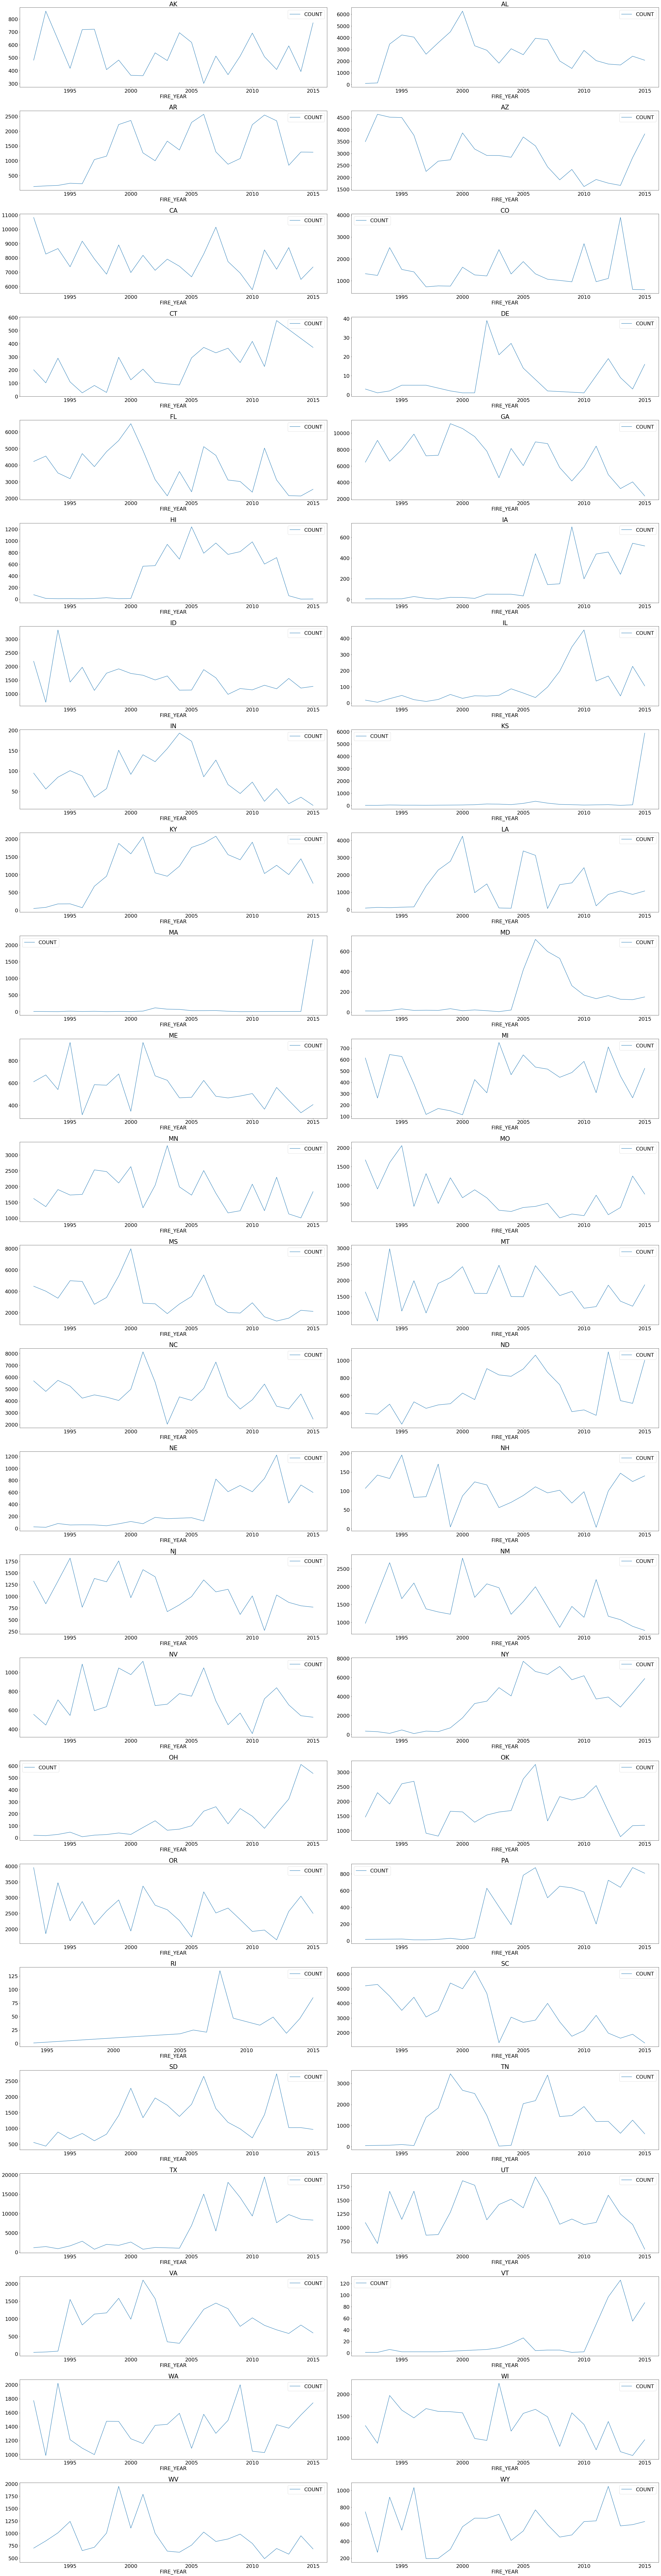

In [36]:
plt.figure(figsize=(40,160))
plt.rcParams.update({'font.size': 22})

# avg_annual_growth_by_state = {}

fire_plots_by_state = US_fires_per_year_by_state.groupby('STATE') #create groupby object
for i, (state, data) in enumerate(fire_plots_by_state):#run through each group and print subplot
#     print(data)
#     print(state)

#     #average growth calcs
    
#     #for some reason grabbing wyoming's numbers for every state
#     ## & state in data['STATE']
#     endyearCount = int(data.loc[(data['FIRE_YEAR'] == data['FIRE_YEAR'].max()) &
#                                 (state == data['STATE']),'COUNT']) 
#     startyearCount = int(data.loc[(data['FIRE_YEAR'] == data['FIRE_YEAR'].min()) &
#                                 (state == data['STATE']),'COUNT'])
#     totalyear = int(data['FIRE_YEAR'].max()) - int(data['FIRE_YEAR'].min())
    
#     print("state: {}, startyear: {}, endyear: {}, totalyear: {}".
#           format(state, startyear, endyear, totalyear))

#     if (totalyear>0):
#         avg_annual_growth_by_state[state] = math.pow((endyear / startyear),(1/totalyear)) -1
    
    #plotting
    ax = plt.subplot(26,2,i+1)
    data.plot(x= 'FIRE_YEAR', y = 'COUNT',ax=ax) 
    ax.set_title(state)

plt.tight_layout()
plt.show()

### Analysis for Question 1b)

Surprisingly, there has been a shift in the states that have the most wildfires.  In 1992, the top 5 states were as follows:

    STATE  FIRE_YEAR  COUNT
96     CA       1992  10833
228    GA       1992   6459
635    NC       1992   5696
954    SC       1992   5195
587    MS       1992   4478

However, in 2015, the counts switched:

     STATE  FIRE_YEAR  COUNT
1049    TX       2015   8304
119     CA       2015   7365
395     KS       2015   5887
826     NY       2015   5884
95      AZ       2015   3819


The states with the greatest increase over the time series were also somewhat unexpected.  Please note that a few states that have high growth rates have been omitted due to small absolute counts relative to the average or suspect data (e.g. Massachusetts and Kansas spiking up unreasonably):

New York saw a 12.23% annual increase from 364 to 5884.
Texas saw a 8.52% increase from 1168 to 8304, exceeding California's wildfire count by about 1000.

Some large states like California actually saw a decrease over time.

California's wildfire count fell -1.60%, while Georgia's saw a -4.11% decline.  Other big contributors saw declines, like North Carolina (-3.42%), South Carolina (-5.61%) and Mississippi (-3.06%).

I believe it would be helpful to plot these drops on a map to see if certain parts of the country are seeing lower fires.

In addition, it would be helpful to understand further why these states are seeing such increases/decreases.

#### Note: maybe want to do first 5 years vs. last 5 years to get rid of low counts?


## Question 1c) Fire size by year

In [37]:
#how many fires have size = 0?
years = df.FIRE_YEAR.unique()
print(type(years))
print("Year\t FireCount\t\t ZeroAreaCount\t Percent")
for year in np.sort(years):
    countFires = df.loc[df['FIRE_YEAR']==year]['FIRE_SIZE'].count()
    countZeroArea = df.loc[(df['FIRE_YEAR']==year) & (df['FIRE_SIZE']<10)]['FIRE_SIZE'].count()

    print(year,"\t", countFires,"\t\t\t", countZeroArea)

<class 'numpy.ndarray'>
Year	 FireCount		 ZeroAreaCount	 Percent
1992 	 67968 			 58517
1993 	 61981 			 52957
1994 	 75947 			 64719
1995 	 71467 			 60772
1996 	 75571 			 62965
1997 	 61441 			 53602
1998 	 68356 			 58859
1999 	 89355 			 75373
2000 	 96416 			 81176
2001 	 86586 			 75477
2002 	 75654 			 65803
2003 	 64639 			 56848
2004 	 67394 			 58474
2005 	 84328 			 70789
2006 	 111472 			 91224
2007 	 91879 			 78954
2008 	 85360 			 71880
2009 	 76634 			 65222
2010 	 78138 			 66906
2011 	 88060 			 73060
2012 	 72756 			 62318
2013 	 64746 			 57605
2014 	 67710 			 58948
2015 	 74460 			 64449


In [38]:
fire_by_year_size = df.groupby('FIRE_YEAR').sum()
fire_by_year_size.drop(columns=['OBJECTID', 'FOD_ID', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'STAT_CAUSE_CODE'
                , 'CONT_DATE', 'CONT_DOY', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE',
                                'Square_Miles','Acreage'],inplace=True)

In [39]:
fire_by_year_size.head()

FIRE_SIZE
FIRE_YEAR              
1992       2.199831e+06
1993       2.191523e+06
1994       4.115670e+06
1995       2.049584e+06
1996       6.004654e+06

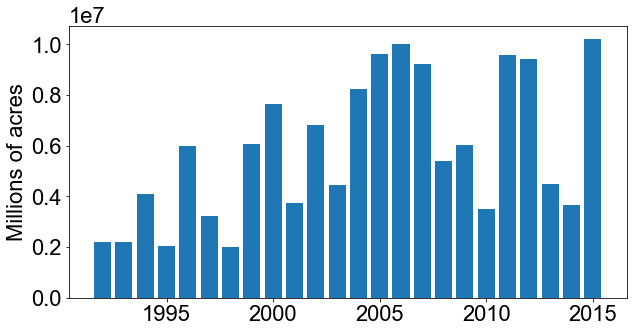

In [59]:
import seaborn as sns
plt.figure(figsize=(10,5))
plt.bar(fire_by_year_size.index, fire_by_year_size['FIRE_SIZE'])
plt.ylabel("Millions of acres")
plt.style.use('seaborn')
plt.show()

In [41]:
#growth rate
avg_annual_growth_acre = math.pow((fire_by_year_size.loc[2015] / fire_by_year_size.loc[1992]),
                           (1/len(fire_by_year_size))) -1

print("The average annual growth rate in fire acreage between 1994 and 2015 was: \
{p:0.2f}%".format(p=avg_annual_growth_acre*100))

The average annual growth rate in fire acreage between 1994 and 2015 was: 6.61%


In [42]:
US_fires_per_year_by_state_size = pd.DataFrame(df.groupby([df['STATE'], df['FIRE_YEAR']]).sum()).reset_index()
US_fires_per_year_by_state_size.drop(columns=['OBJECTID', 'FOD_ID', 'DISCOVERY_DATE', 
                                              'DISCOVERY_DOY', 'STAT_CAUSE_CODE', 
                                              'CONT_DATE', 'CONT_DOY', 'LATITUDE', 
                                              'LONGITUDE', 'OWNER_CODE', 'Square_Miles','Acreage']
                                     ,inplace=True)
US_fires_per_year_by_state_size = US_fires_per_year_by_state_size.merge(state_sizes, on='STATE')
US_fires_per_year_by_state_size['Percent_land_burned'] =\
    US_fires_per_year_by_state_size['FIRE_SIZE']/US_fires_per_year_by_state_size['Acreage']

US_fires_per_year_by_state_size['Percent_land_burned'] =\
    US_fires_per_year_by_state_size['Percent_land_burned']*100 
US_fires_per_year_by_state_size.sort_values('Percent_land_burned', 
                                            ascending=False).head()

STATE  FIRE_YEAR   FIRE_SIZE  Square_Miles   Acreage  Percent_land_burned
295     ID       2007  2184656.24         82751  38065460             5.739209
300     ID       2012  1775106.39         82751  38065460             4.663299
1101    WA       2015  1161646.38         66582  30627720             3.792794
288     ID       2000  1350786.48         82751  38065460             3.548588
766     NV       1999  1773486.60        109806  50510760             3.511107

In [43]:
#Top 10 states in terms of average annual land burning
US_fires_per_year_by_state_size.groupby('STATE').mean().\
    sort_values('Percent_land_burned', ascending=False).head(10)

FIRE_YEAR     FIRE_SIZE  Square_Miles      Acreage  Percent_land_burned
STATE                                                                         
ID        2003.5  5.701806e+05       82751.0   38065460.0             1.497895
OR        2003.5  3.505334e+05       96003.0   44161380.0             0.793756
FL        2003.5  1.848645e+05       53997.0   24838620.0             0.744262
NV        2003.5  3.756606e+05      109806.0   50510760.0             0.743724
CA        2003.5  5.310774e+05      155973.0   71747580.0             0.740203
WA        2003.5  1.992591e+05       66582.0   30627720.0             0.650584
AK        2003.5  1.343046e+06      570374.0  262372040.0             0.511886
NM        2003.5  2.658351e+05      121365.0   55827900.0             0.476169
UT        2003.5  1.714553e+05       82168.0   37797280.0             0.453618
AZ        2003.5  2.323617e+05      113642.0   52275320.0             0.444496

In [44]:
US_fires_per_year_by_state_size.to_csv('StateBurnPercents.csv')

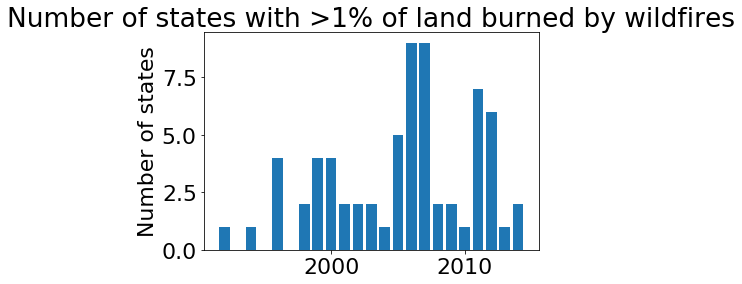

In [45]:
## number of states with >1% of land burned per year.
counts = {}

for year in range(1992,2015):
    count = US_fires_per_year_by_state_size.loc[(US_fires_per_year_by_state_size
                                                ['Percent_land_burned']>1) &
                                                (US_fires_per_year_by_state_size
                                                 ['FIRE_YEAR'] == year)]['STATE'].count()
    counts[year]=count

x = counts.keys()
y = counts.values()
plt.bar(x,y)
plt.title("Number of states with >1% of land burned by wildfires")
plt.ylabel("Number of states")
plt.show()

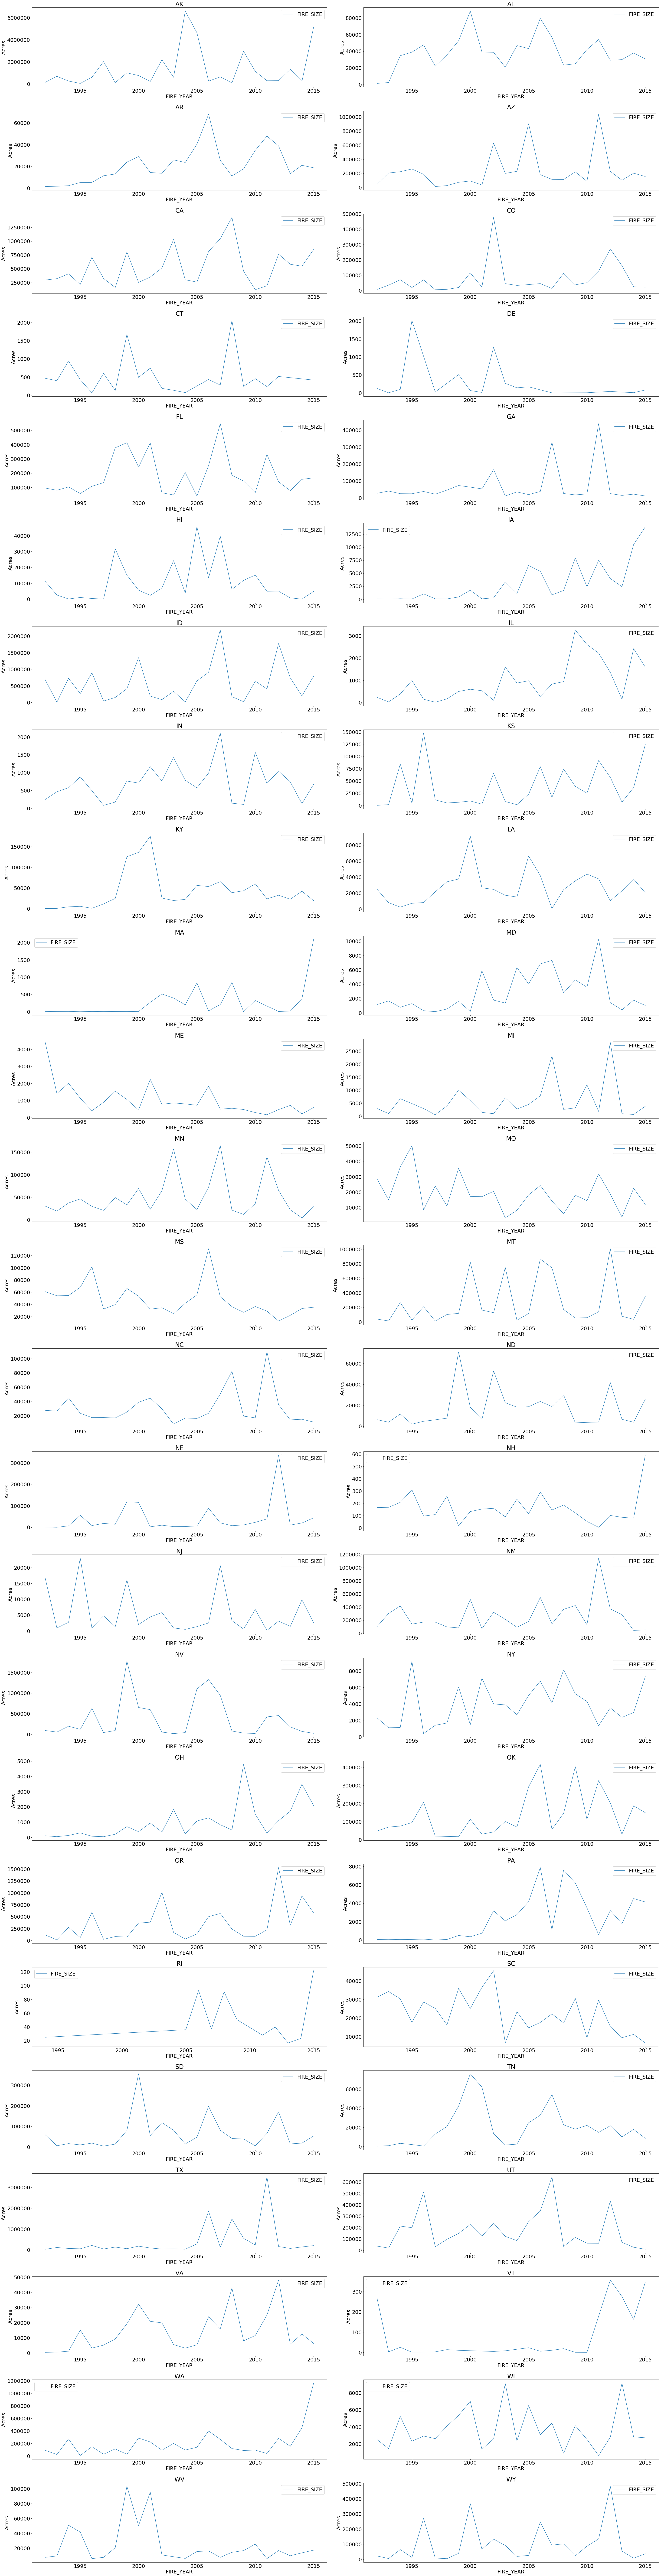

In [46]:
plt.figure(figsize=(40,160))
plt.rcParams.update({'font.size': 22})


fire_size_plots_by_state = US_fires_per_year_by_state_size.groupby('STATE')
for i, (state, data) in enumerate(fire_size_plots_by_state):#run through each group and print subplot

    ax = plt.subplot(26,2,i+1)
    data.plot(x= 'FIRE_YEAR', y = 'FIRE_SIZE',ax=ax)
    ax.set_ylabel('Acres')
    ax.set_title(state)

plt.tight_layout()
plt.show()

In [48]:
mask1992acre = US_fires_per_year_by_state_size['FIRE_YEAR'] == 1992
mask2015acre = US_fires_per_year_by_state_size['FIRE_YEAR'] == 2015

states1992 = US_fires_per_year_by_state_size[mask1992acre]
states2015 = US_fires_per_year_by_state_size[mask2015acre]

print(1992)
print(states1992.sort_values('FIRE_SIZE', ascending=False).head(7))
print()
print(2015)
print(states2015.sort_values('FIRE_SIZE', ascending=False).head(7))


states1992_2015 = states1992.merge(states2015, on = 'STATE')
    
states1992_2015['GROWTH'] = states1992_2015['FIRE_SIZE_y'] / states1992_2015['FIRE_SIZE_x']
states1992_2015['AVG_ANNUAL_GROWTH'] = (states1992_2015['GROWTH']**(1/(2015-1992+1))) -1
states1992_2015.sort_values('AVG_ANNUAL_GROWTH', ascending=False)

1992
    STATE  FIRE_YEAR  FIRE_SIZE  Square_Miles    Acreage  Percent_land_burned
280    ID       1992  684658.90         82751   38065460             1.798636
96     CA       1992  296439.80        155973   71747580             0.413170
0      AK       1992  142717.40        570374  262372040             0.054395
855    OR       1992  117437.36         96003   44161380             0.265928
735    NM       1992   99202.45        121365   55827900             0.177693
184    FL       1992   95279.70         53997   24838620             0.383595
759    NV       1992   92345.80        109806   50510760             0.182824

2015
     STATE  FIRE_YEAR   FIRE_SIZE  Square_Miles    Acreage  \
23      AK       2015  5136703.76        570374  262372040   
1101    WA       2015  1161646.38         66582   30627720   
119     CA       2015   848728.61        155973   71747580   
303     ID       2015   791026.11         82751   38065460   
878     OR       2015   579124.05         96003   44161

STATE  FIRE_YEAR_x  FIRE_SIZE_x  Square_Miles_x  Acreage_x  \
15    KS         1992      251.600           81823   37638580   
18    MA         1992        5.400            7838    3605480   
11    IA         1992       85.300           55875   25702500   
37    PA         1992       59.700           44820   20617200   
28    NE         1992     1227.100           76878   35363880   
0     AK         1992   142717.400          570374  262372040   
16    KY         1992      604.500           39732   18276720   
1     AL         1992     1253.200           50750   23345000   
34    OH         1992      101.700           40953   18838380   
40    TN         1992      429.600           41220   18961200   
43    VA         1992      434.600           39598   18215080   
45    WA         1992    89681.050           66582   30627720   
2     AR         1992     1478.500           52075   23954500   
25    MT         1992    38591.720          145556   66955760   
13    IL         1992      235.400           55593   25572780   
41    TX         1992    33610.300          261914  120480440   
36    OR         1992   117437.360           96003   44161380   
27    ND         1992     6373.900           68994   31737240   
3     AZ         1992    42593.650          113642   52275320   
29    NH         1992      164.671            8969    4125740   
35    OK         1992    47575.100           68679   31592340   
33    NY         1992     2334.400           47224   21723040   
5     CO         1992     7451.900          103730   47715800   
4     CA         1992   296439.800          155973   71747580   
14    IN         1992      247.300           35870   16500200   
47    WV         1992     7514.400           24087   11080020   
8     FL         1992    95279.700           53997   24838620   
48    WY         1992    22241.800           97105   44668300   
44    VT         1992      270.000            9249    4254540   
21    MI         1992     2987.400           56809   26132140   
12    ID         1992   684658.900           82751   38065460   
46    WI         1992     2520.610           54314   24984440   
22    MN         1992    30182.130           79617   36623820   
39    SD         1992    59412.280           75898   34913080   
19    MD         1992     1160.300            9775    4496500   
6     CT         1992      466.050            4845    2228700   
17    LA         1992    25129.100           43566   20040360   
7     DE         1992      124.000            1955     899300   
24    MS         1992    60830.100           46914   21580440   
31    NM         1992    99202.450          121365   55827900   
10    HI         1992    11161.300            6423    2954580   
9     GA         1992    27016.370           57919   26642740   
23    MO         1992    28716.000           68898   31693080   
26    NC         1992    27489.100           48718   22410280   
42    UT         1992    37531.910           82168   37797280   
32    NV         1992    92345.800          109806   50510760   
38    SC         1992    31202.800           30111   13851060   
30    NJ         1992    16603.650            7419    3412740   
20    ME         1992     4399.300           30865   14197900   

    Percent_land_burned_x  FIRE_YEAR_y   FIRE_SIZE_y  Square_Miles_y  \
15               0.000668         2015  1.242105e+05           81823   
18               0.000150         2015  2.094230e+03            7838   
11               0.000332         2015  1.391428e+04           55875   
37               0.000290         2015  4.136240e+03           44820   
28               0.003470         2015  4.419480e+04           76878   
0                0.054395         2015  5.136704e+06          570374   
16               0.003307         2015  1.968002e+04           39732   
1                0.005368         2015  3.083371e+04           50750   
34               0.000540         2015  2.084090e+03           40953   
40               0.002266       

## Question 1c) analysis

Clearly there is a a different conclusion when looking at acreage, with annual growth of 6.61% between 1992 and 2015.  There appear to be a few cycles in the late 2000s and early 2010s that deserve more review.

In terms of drivers, we can see a few select states seeing drastic increases in their fire sizes.  Ignoring smaller states (e.g. MA) and anomalous data (e.g. KS), we can see that the following states have seen the most drastic increase in fires by acre:

Nebraska, Alaska, Alabama, Washington, Arizona and Montana.

The following states have seen the greatest decrease:

South Carolina, Nevada, Utah, North Carolina, Missouri and Georgia.

##### Additional takeaways based on proportional fire sizes (i.e. once taking into account state size)

There were some surprises in terms of which states see the greatest percent of their land burn each year.  California is number 5 with just 0.74% of land mass burning each year.  Idaho sees 1.50% of its land burn each year.  It will be interesting to understand why this is (note, most of Idaho is federal land, so this is worth investigating further... are these planned fires?).  Oregon, Florida and Nevada are also in the top 5.  Florida is the only state not in the Western United States, so it will be interesting to understand what is unique about their fires, if anything. 

Another takeaway is in regards to the number of states with >1% of their land mass being burned each year.  There has been an increase over time, with huge spikes in 2007/8 and 2011/2012.  It will be interesting to understand the cause of the larger fire numbers in those years.

# Ubuntu Shell code to open all tar.z files

root@LAPTOP-1NUE2BLM:/mnt/c/Users/oldye/documents/cmu_2018/Spring2019/DataScience_BigData_95885/project1/Data/rain# for folder in ./states/*; do for file in *.tar.Z; do tar -zxf "$file"; done

for file in *.tar.Z; do tar -zxf "$file"; done

# Problems to address

Consider averaging 1995-2000 and 2010-2015 when looking at state levels.